## Plot Tag Id by read depth

Lorenz suggested that I plot tag against read depth to see if read depth has something to do with how tags are assigned. 

It looks like the individual ``.matches.tsv`` files have locus names based on the catalog (in common across individuals) and the number of reads contained in the locus. So I need to sum these across individuals.

In [5]:
cd /mnt/hgfs/SHARED_FOLDER/WorkingFolder/Stacks_2

/mnt/hgfs/SHARED_FOLDER/WorkingFolder/Stacks_2


In [15]:
!printf "%s\n" *.matches.tsv > list_matches_filenames.txt

In [17]:
!head list_matches_filenames.txt

FG001.matches.tsv
FG002.matches.tsv
FG003.matches.tsv
FG004.matches.tsv
FG005.matches.tsv
FG006.matches.tsv
FG007.matches.tsv
FG009.matches.tsv
FG010.matches.tsv
FG011.matches.tsv


In [23]:
file_of_filenames = open("list_matches_filenames.txt","r")
lines = file_of_filenames.readlines()
filename_list = []
for line in lines:
    filename = line.strip()
    filename_list.append(filename)

print filename_list[0:9]

['FG001.matches.tsv', 'FG002.matches.tsv', 'FG003.matches.tsv', 'FG004.matches.tsv', 'FG005.matches.tsv', 'FG006.matches.tsv', 'FG007.matches.tsv', 'FG009.matches.tsv', 'FG010.matches.tsv']


In [24]:
# initiate dictionary
rd_dict = {}

In [31]:
for file in filename_list:
    indfile = open(file,"r")
    lines = indfile.readlines()[1:]
    for line in lines:
        linelist = line.strip().split()
        locus = int(linelist[2])
        count = int(linelist[6])
        if locus not in rd_dict:
            rd_dict[locus] = int(count)
        elif locus in rd_dict:
            oldcount = rd_dict[locus]
            newcount = oldcount + count
            rd_dict[locus] = newcount
        else:
            print "Something funky is going on."
    indfile.close()

In [33]:
locus_list = rd_dict.keys()
locus_list.sort()
locus_list[0:9]

In [38]:
count_list = []
for locus in locus_list:
    count = rd_dict[locus]
    count_list.append(count)
print count_list[0:9]

[2880, 3489, 2335, 1837, 13380, 13497, 6914, 3665, 1560]


In [42]:
# double check
rd_dict[1]
rd_dict[2]
rd_dict[9]

1560

In [43]:
import matplotlib.pyplot as plt

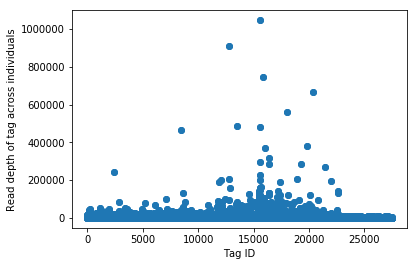

In [46]:
plt.scatter(locus_list, count_list)
plt.xlabel("Tag ID")
plt.ylabel("Read depth of tag across individuals")
plt.show()

Looks like no relationship to me!

## Further explore read depth

Something is behaving funky here, don't trust the plots below yet!

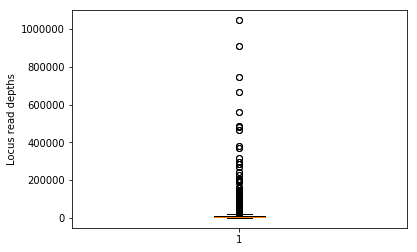

In [47]:
plt.boxplot(count_list)
plt.ylabel("Locus read depths")
plt.show()

In [48]:
# get individual count list for boxplot
ind_count_list = []

for file in filename_list:
    indfile = open(file,"r")
    lines = indfile.readlines()[1:]
    for line in lines:
        linelist = line.strip().split()
        count = int(linelist[6])
        ind_count_list.append(count)
    indfile.close()

In [57]:
print ind_count_list

[213, 249, 61, 3, 7, 278, 327, 28, 111, 205, 244, 188, 57, 63, 65, 1, 121, 124, 253, 134, 100, 121, 129, 135, 83, 93, 104, 71, 72, 124, 138, 116, 121, 87, 234, 117, 53, 135, 327, 115, 63, 125, 93, 141, 115, 97, 187, 99, 79, 198, 71, 101, 114, 49, 65, 66, 1, 72, 25, 68, 117, 162, 41, 105, 155, 112, 1, 39, 137, 155, 99, 110, 2, 223, 143, 235, 46, 35, 83, 103, 1, 213, 128, 95, 83, 30, 76, 129, 106, 100, 87, 215, 85, 113, 93, 97, 114, 141, 138]


In [62]:
less_1000 = []
for count in ind_count_list:
    if count < 1000:
        less_1000.append(count)

print str(float(len(less_1000))/float(len(ind_count_list))*100)[0:5] + "% of individual locus read depths were less than 1000"

99.68% of individual locus read depths were less than 1000


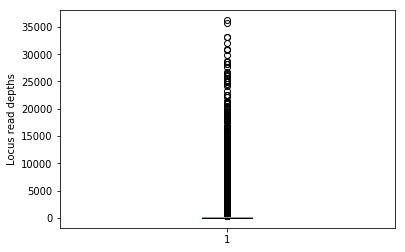

In [63]:
plt.close()
plt.boxplot(ind_count_list)
plt.ylabel("Locus read depths")
plt.show()

That can't be right... why does the y axis go so high?

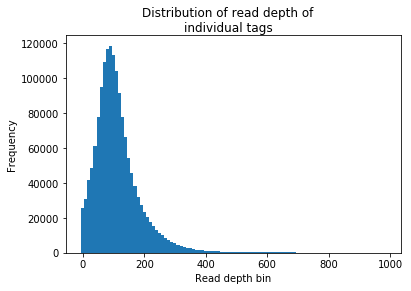

In [66]:
import numpy as np

plt.hist(less_1000, bins = np.arange(0,1000,10)-5)
plt.xlabel("Read depth bin")
plt.ylabel("Frequency")
plt.suptitle("Distribution of read depth of\nindividual tags")
plt.show()

It occurred to me that it could be intereting to check whether the tags with the least read depth are also the funky ones. I could build simple loops to make lists of Catalog IDs with low, medium, and high read depth, and see if that's correlated to 

I'd measure "funk" by 